# Machine Problem: Object Detection and Recognition using YOLO



## Libraries

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Load a pre-trained YOLO model using TensorFlow

In [7]:
# Load YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load YOLO labels
with open("coco.names", "r") as f:
    class_names = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers_indices = net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layers_indices.flatten()]



## Feed an image to the YOLO model for object detection.

In [8]:
image = cv2.imread('/content/Plains_Zebra_Equus_quagga.jpg')
height, width, channels = image.shape

## Visualize the bounding boxes and class labels on the detected objects in the image

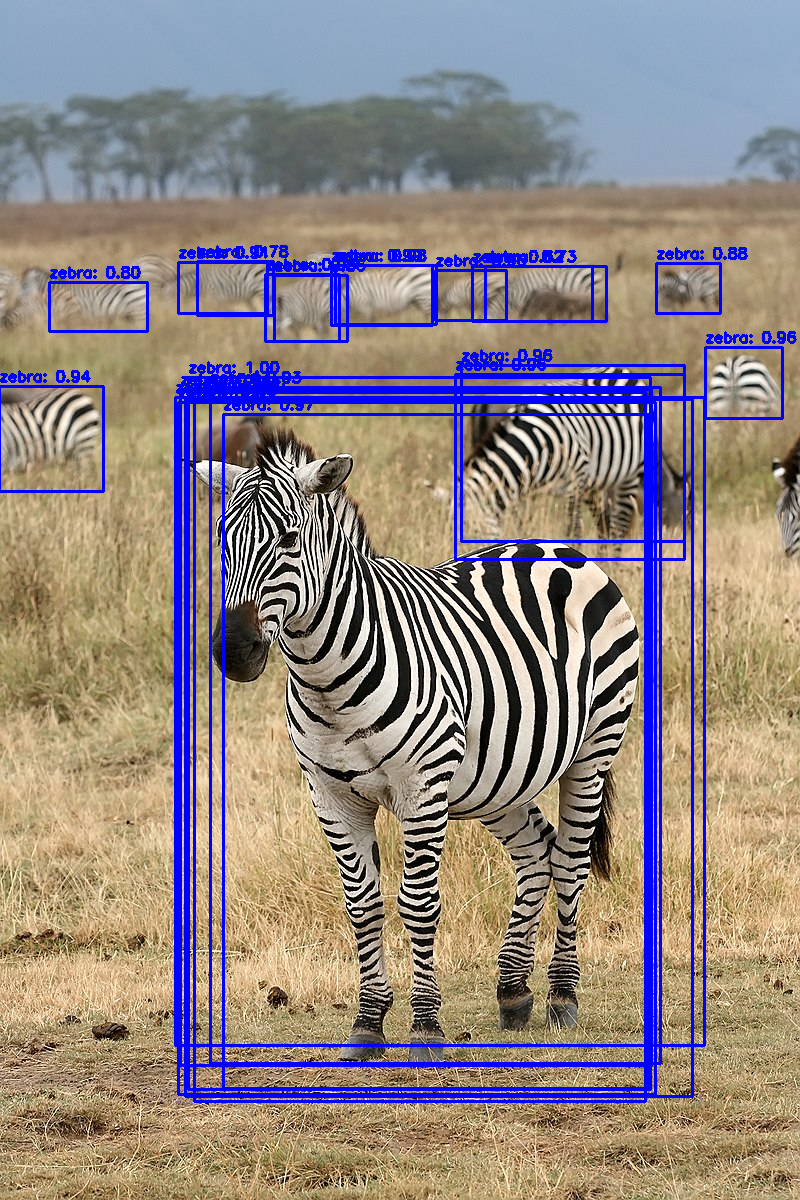

In [10]:

# Function to perform object detection
def detect_objects(image_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Preprocess the image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Run inference
    detections = net.forward(output_layers)

    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.6 :
                box = obj[0:4] * np.array([width, height, width, height])
                (center_x, center_y, w, h) = box.astype("int")

                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))

                # Draw bounding box and label
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                label = f"{class_names[class_id]}: {confidence:.2f}"
                cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)





    cv2_imshow(image)

#Paths will replace image for multiple results
yolo_result_1 = detect_objects("/content/Plains_Zebra_Equus_quagga.jpg")